In [111]:
import warnings
warnings.filterwarnings("ignore")

<font size="+5">#03. Machine Learning & Linear Regression</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Discipline to Search Solutions in Google

> Apply the following steps when **looking for solutions in Google**:
>
> 1. **Necesity**: How to load an Excel in Python?
> 2. **Search in Google**: by keywords
>   - `load excel python`
>   - ~~how to load excel in python~~
> 3. **Solution**: What's the `function()` that loads an Excel in Python?
>   - A Function to Programming is what the Atom to Phisics.
>   - Every time you want to do something in programming
>   - **You will need a `function()`** to make it
>   - Theferore, you must **detect parenthesis `()`**
>   - Out of all the words that you see in a website
>   - Because they indicate the presence of a `function()`.

# Load the Data

> By running the following commands:

```python
import seaborn as sns
sns.get_dataset_names()
```

> You'll observe a list of posible `tables` that we could work with.
> You may use whichever you'd like.
> Just substitue `?` by the name of the dataset you want.

```python
sns.load_dataset(name=?)
```

In [2]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [16]:
df = sns.load_dataset(name='iris')

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# `LinearRegression()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

### Code Thinking

> - By the time you get to the actual `function()` to compute the model
> - You'll notice they're asking you for two parameters:
> 1. `X`: **explanatory variable**
> 2. `y`: **target varaible**
> It's recommended that you make a `Data Visualization`
>
> - To analyze if the two variables are related?
> - i.e., do you think `X` variable is good to predict `y`?
> - If so, the Linear Regression would be great!

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

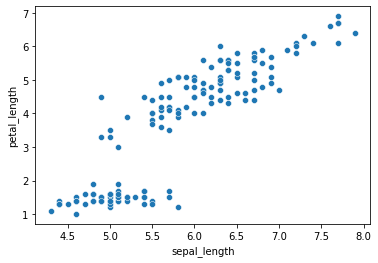

In [22]:
sns.scatterplot(x='sepal_length', y='petal_length', data=df)

### Scatterplot with Variables from DataFrame

> You may observe in the plot that the points could be related through a line.
>
> Otherwise, you may select another pair of variables.

### Finally `fit()` the Model

> - Pass the `objects` that **contains the sequence of numbers** of the two variables
> - To the `parameters` of the function that computes the Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [28]:
type(df['sepal_length'])

pandas.core.series.Series

In [29]:
df['sepal_length'].shape

(150,)

In [30]:
type(df[['sepal_length']])

pandas.core.frame.DataFrame

In [33]:
df[['sepal_length']].shape

(150, 1)

In [35]:
model.fit(X=df[['sepal_length']], y=df[['petal_length']])

LinearRegression()

# Model Interpretation

> 1. Especify the **mathematical equation** of the model.
> 2. **Interpret the coefficients** from the equation.

In [37]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['sepal_length'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[1.85843298]]),
 '_residues': array([111.45915512]),
 'rank_': 1,
 'singular_': array([10.10783524]),
 'intercept_': array([-7.10144337])}

In [91]:
#intercept = constante, #coef = pendiente (incremento)
print('y= ',model.intercept_, '+', model.coef_, '* X')

y=  [-7.10144337] + [[1.85843298]] * X


In [112]:
#prediccion cuando X==0
model.predict(X=[[0]])

array([[-7.10144337]])

In [113]:
#prediccion cuando X==1
model.predict(X=[[1]])

array([[-5.24301039]])

In [114]:
#pendiente(incremento)
model.predict(X=[[1]]) - model.predict(X=[[0]])

array([[1.85843298]])

# Calculate Predictions

> - `model.predict()`

In [57]:
predicciones= model.predict(X=df[['sepal_length']])

In [59]:
dfsel = df[['sepal_length','petal_length']].copy()

In [60]:
dfsel['pred']= predicciones
dfsel.head()

,sepal_length,petal_length,pred
0,5.1,1.4,2.376565
1,4.9,1.4,2.004878
2,4.7,1.3,1.633192
3,4.6,1.5,1.447348
4,5.0,1.4,2.190722


# Visualize the Model

> 1. **Real Data**.
> 2. **Model: predictions** calculated with the mathematical equation.

In [62]:
import matplotlib.pyplot as plt

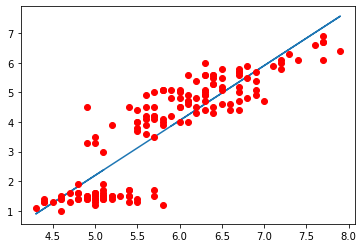

In [69]:
plt.plot(dfsel['sepal_length'], dfsel['pred'])
plt.plot(dfsel['sepal_length'], dfsel['petal_length'], 'ro')

# Real vs. Predicted Data

> How good is our model?
>
> 1. Create a new `DataFrame` column to assign the predictions.
>
> - `df['pred'] = predicciones`

In [95]:
dfsel['pred']

0      2.376565
1      2.004878
2      1.633192
3      1.447348
4      2.190722
         ...   
145    5.350058
146    4.606684
147    4.978371
148    4.420841
149    3.863311
Name: pred, Length: 150, dtype: float64

> - `df.sample(10)` to check if predictions are equal to reality:

In [94]:
dfsel.sample(10)

,sepal_length,petal_length,pred
89,5.5,4.0,3.119938
78,6.0,4.5,4.049154
106,4.9,4.5,2.004878
30,4.8,1.6,1.819035
8,4.4,1.4,1.075662
46,5.1,1.6,2.376565
4,5.0,1.4,2.190722
62,6.0,4.0,4.049154
41,4.5,1.3,1.261505
144,6.7,5.7,5.350058


> 2. How to measure the **model's error**?
> - How good is our model to predict reality?
> - `model.score()`

In [108]:
dfsel['error^2']= (dfsel['petal_length']-dfsel['pred'])**2
dfsel['deviation']= (dfsel['petal_length']-dfsel['petal_length'].mean())**2
print('Manual R2:', 1-(dfsel['error^2'].sum()/dfsel['deviation'].sum()))

Manual R2: 0.759954645772515


In [100]:
#Según el R2 de model.score
model.score(dfsel[['sepal_length']], dfsel['petal_length'])

0.759954645772515

In [109]:
#segun sklearn
from sklearn.metrics import r2_score

r2_score(dfsel['petal_length'], dfsel['pred'])

0.759954645772515

In [110]:
dfsel.sample(10)

,sepal_length,petal_length,pred,error,error^2,deviation
25,5.0,1.6,2.190722,0.590722,0.348952,4.656964
92,5.8,4.0,3.677468,-0.322532,0.104027,0.058564
73,6.1,4.7,4.234998,-0.465002,0.216227,0.887364
68,6.2,4.5,4.420841,-0.079159,0.006266,0.550564
0,5.1,1.4,2.376565,0.976565,0.953679,5.560164
123,6.3,4.9,4.606684,-0.293316,0.086034,1.304164
66,5.6,4.5,3.305781,-1.194219,1.426158,0.550564
67,5.8,4.1,3.677468,-0.422532,0.178533,0.116964
26,5.0,1.6,2.190722,0.590722,0.348952,4.656964
69,5.6,3.9,3.305781,-0.594219,0.353096,0.020164


# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand **how the Machine Learns/Optimizes the model**
    - [ ] No more than to find the best numbers in a mathematical equation.
- [ ] The `function()` as the indivisible part of programming.
    - As the **atom**: the key element in the Universe.
- [ ] Understand **what's going on inside the computer** as you execute a function.
    - Is the code downloaded online, or could we use it withoug internet conection.
- [ ] Use **programming as a tool**.
    - It's a **means to an end. NOT an end itself** (as hard as it may be to get started with).
- [ ] Understand that statistics is not a perfect science. 
    - It tries to **approximate to the reality** the best way it can.
- [ ] **Measuring the error** is nothing more than measuring the difference between reality and predictions.
- [ ] We may use more than one mathematical formula to calculate the same variable.
    - Different models/equations/algorightms to calculate the same variable.
    - Some models might be better than other ones.